In [70]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive

In [71]:
# Mount Google Drive
drive.mount('/content/drive')

# File path to your dataset stored on Google Drive
# Update this path based on where the dataset is located in your Drive
file_path = '/content/drive/MyDrive/healthcare_breast_data.csv'  # Replace with your actual file path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# Load the dataset
data = pd.read_csv(file_path, header=None)

In [27]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,NaN
1,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN
2,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,NaN
3,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,NaN
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,NaN


In [73]:
# Assign column names as per the dataset description
columns = ["id", "diagnosis",
           "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
           "compactness_mean", "concavity_mean", "concavepoints_mean", "symmetry_mean", "fractal_dimension_mean",
           "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
           "compactness_se", "concavity_se", "concavepoints_se", "symmetry_se", "fractal_dimension_se",
           "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
           "compactness_worst", "concavity_worst", "concavepoints_worst", "symmetry_worst", "fractal_dimension_worst","NaN"]

data.columns = columns

data = data.drop('NaN', axis=1)

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
2,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
3,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173


In [74]:
# Data Preprocessing
# Convert the Diagnosis column to numerical (Malignant = 1, Benign = 0)
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

In [75]:
# Drop 'ID' column as it's not useful for prediction
data = data.drop('id', axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
0,2,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
2,1,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
3,1,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
4,1,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173


In [77]:
# Check for non-numeric entries in the dataset
# We want to identify any cells that have non-numeric values causing issues
for col in data.columns[1:]:  # Skip the 'diagnosis' column
    non_numeric = data[col].apply(pd.to_numeric, errors='coerce').isnull()
    if non_numeric.any():
        print(f"Non-numeric values found in column: {col}")
        print(data[non_numeric][[col]].head())

Non-numeric values found in column: radius_mean
   radius_mean
0  radius_mean
Non-numeric values found in column: texture_mean
   texture_mean
0  texture_mean
Non-numeric values found in column: perimeter_mean
   perimeter_mean
0  perimeter_mean
Non-numeric values found in column: area_mean
   area_mean
0  area_mean
Non-numeric values found in column: smoothness_mean
   smoothness_mean
0  smoothness_mean
Non-numeric values found in column: compactness_mean
   compactness_mean
0  compactness_mean
Non-numeric values found in column: concavity_mean
   concavity_mean
0  concavity_mean
Non-numeric values found in column: concavepoints_mean
    concavepoints_mean
0  concave points_mean
Non-numeric values found in column: symmetry_mean
   symmetry_mean
0  symmetry_mean
Non-numeric values found in column: fractal_dimension_mean
   fractal_dimension_mean
0  fractal_dimension_mean
Non-numeric values found in column: radius_se
   radius_se
0  radius_se
Non-numeric values found in column: texture_

In [78]:
# Convert all feature columns (from 2 to 32) to float (ignore errors and coerce)
data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

In [81]:
# Handle missing values by filling them with the mean of each column
data.fillna(data.mean(), inplace=True)

<ipython-input-81-cb806ca224dd>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(data.mean(), inplace=True)


In [82]:
# Verify that the conversion worked and there are no missing values
print("Missing values after preprocessing:")
print(data.isnull().sum())

Missing values after preprocessing:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concavepoints_mean         0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concavepoints_se           0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concavepoints_worst        0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [83]:
data.dtypes

,0
diagnosis,int64
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concavepoints_mean,float64
symmetry_mean,float64


In [84]:
# Split features (X) and target variable (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [85]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Model: Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
# Predictions
y_pred = model.predict(X_test)

In [88]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9737


In [89]:
# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



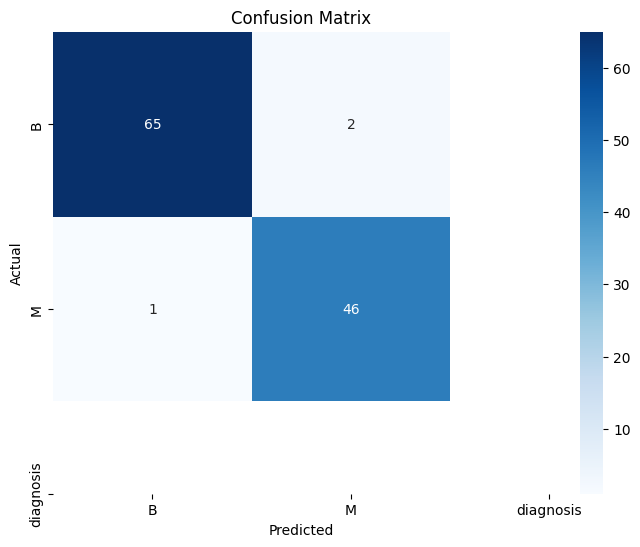

In [90]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [91]:
# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

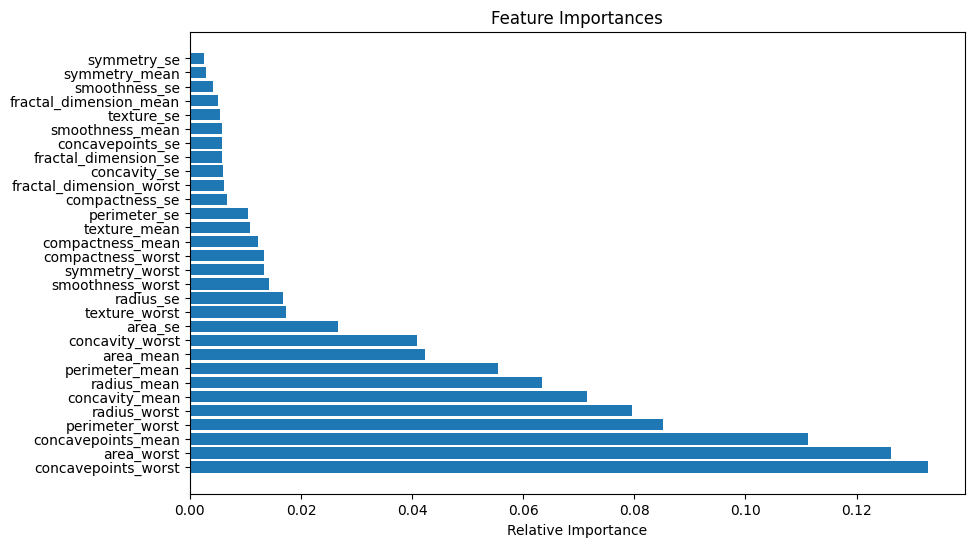

In [92]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()